In [23]:
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [24]:
file_record = pd.read_csv('copernicus_files.csv', names=['file','status','lat','lon','min','max','mean','std']
                         )
print(f"{len(file_record):,} total rows")

df = file_record[file_record.status==1].drop_duplicates(subset='file')
print(f"{len(df):,} unique rows have values")

140,459 total rows
26,296 unique rows have values


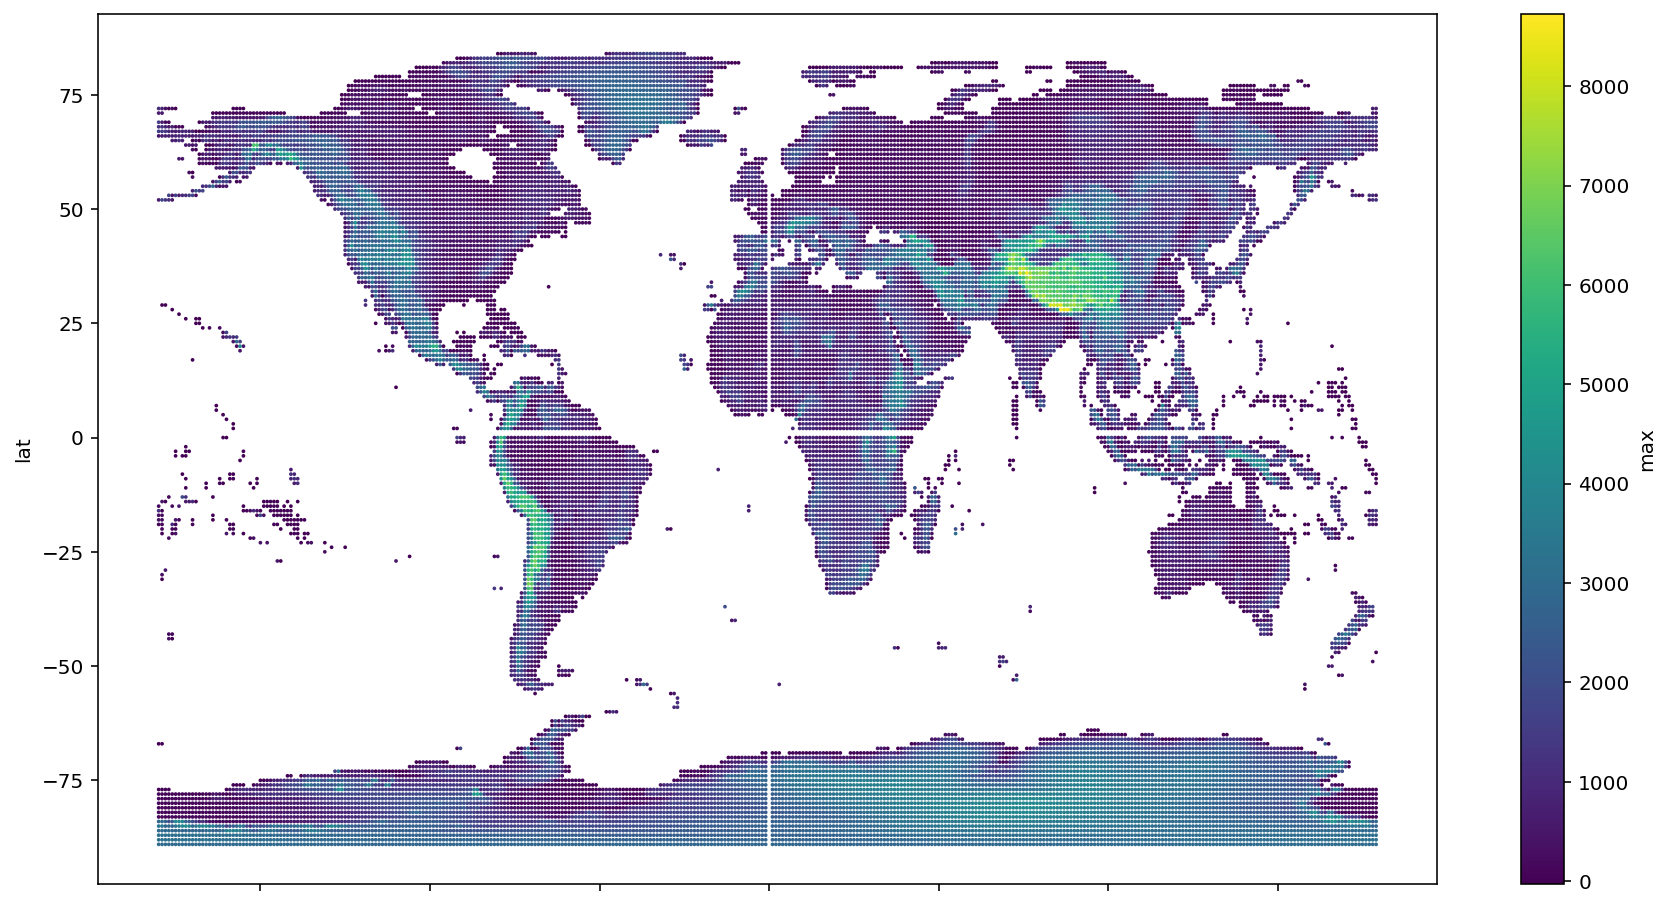

In [25]:
df.plot.scatter(x='lon',y='lat',c='max',cmap='viridis',figsize=(15,8), s = 0.75);

In [22]:
sorted(df.lat.unique())

[-89.0,
 -88.0,
 -87.0,
 -86.0,
 -85.0,
 -84.0,
 -83.0,
 -82.0,
 -81.0,
 -80.0,
 -79.0,
 -78.0,
 -77.0,
 -76.0,
 -75.0,
 -74.0,
 -73.0,
 -72.0,
 -71.0,
 -70.0,
 -69.0,
 -68.0,
 -67.0,
 -66.0,
 -65.0,
 -64.0,
 -63.0,
 -62.0,
 -61.0,
 -60.0,
 -59.0,
 -58.0,
 -57.0,
 -56.0,
 -55.0,
 -54.0,
 -53.0,
 -52.0,
 -51.0,
 -50.0,
 -49.0,
 -48.0,
 -47.0,
 -46.0,
 -45.0,
 -44.0,
 -43.0,
 -42.0,
 -41.0,
 -40.0,
 -39.0,
 -38.0,
 -37.0,
 -36.0,
 -35.0,
 -34.0,
 -33.0,
 -32.0,
 -31.0,
 -30.0,
 -29.0,
 -28.0,
 -27.0,
 -26.0,
 -25.0,
 -24.0,
 -23.0,
 -22.0,
 -21.0,
 -20.0,
 -19.0,
 -18.0,
 -17.0,
 -16.0,
 -15.0,
 -14.0,
 -13.0,
 -12.0,
 -11.0,
 -10.0,
 -9.0,
 -8.0,
 -7.0,
 -6.0,
 -5.0,
 -4.0,
 -3.0,
 -2.0,
 -1.0,
 0.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0

Text(0.5, 1.0, '3 Degree rolling mean of STDEV (/200) for every 3rd latitude')

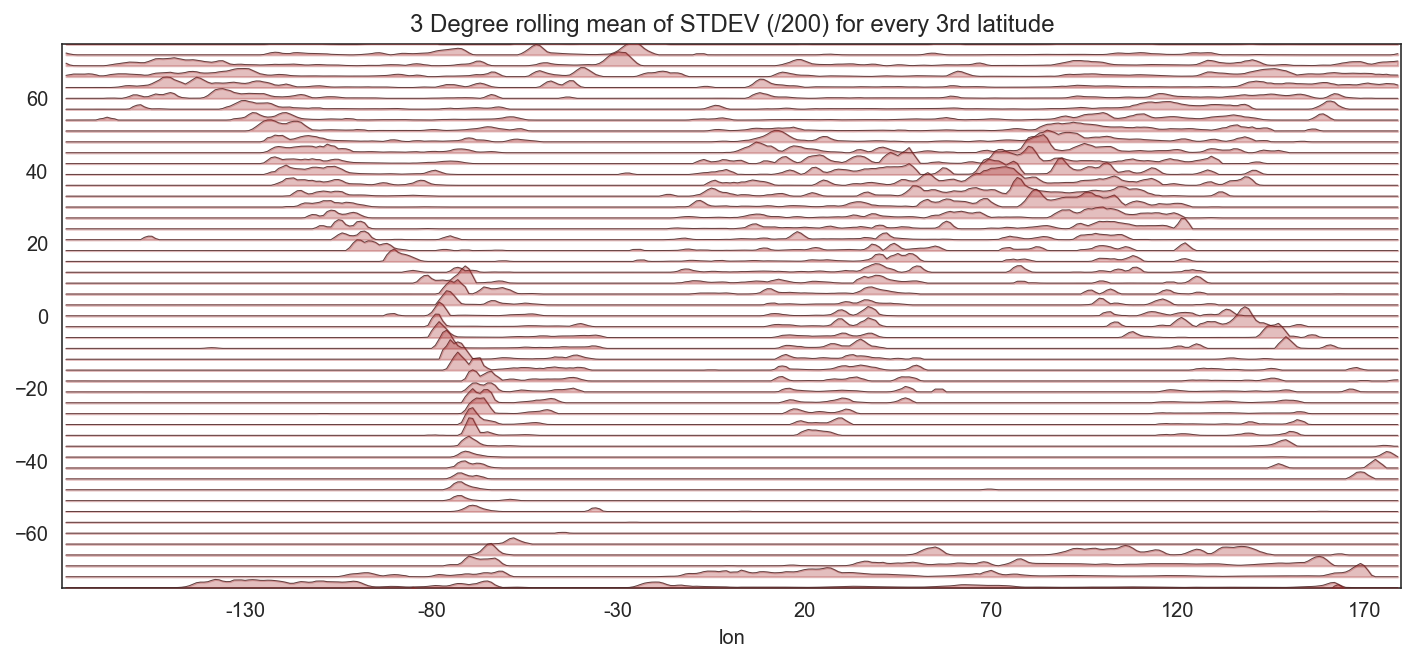

In [94]:
# Now let's try to make it a line plot
sns.set_style('white')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(12,5))

for lat, columns in df.groupby('lat'):
    # Vertical density of lines
    if lat % 3 == 0:
        columns.lon = columns.lon.astype(int) + 180
        
        # Min / Max / Mean
        raw = pd.DataFrame(columns.set_index('lon').reindex(range(0,360)).fillna(0))['std']
        
        #Define the amplitude of the lines
        normalized = raw.rolling(3).mean().apply( lambda d: lat + (d/200) )
        
        #Now plot the area white (to cover up the row above it, if it exists)
        ax.fill_between(x=normalized.index, y1=lat, y2=normalized, color='brown', alpha=0.3, zorder=lat+90)
        
        normalized.plot(ax = ax, color='k',linestyle='-',linewidth=0.5, alpha=0.7, zorder=lat)

          
ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x) - 180}")
ax.set_ylim(-75, 75 )
ax.set_xlim(1, 360 )
ax.set_title("3 Degree rolling mean of STDEV (/200) for every 3rd latitude")

Text(0.5, 1.0, '2 Degree rolling mean of max elevation (/1000) for every 3rd latitude')

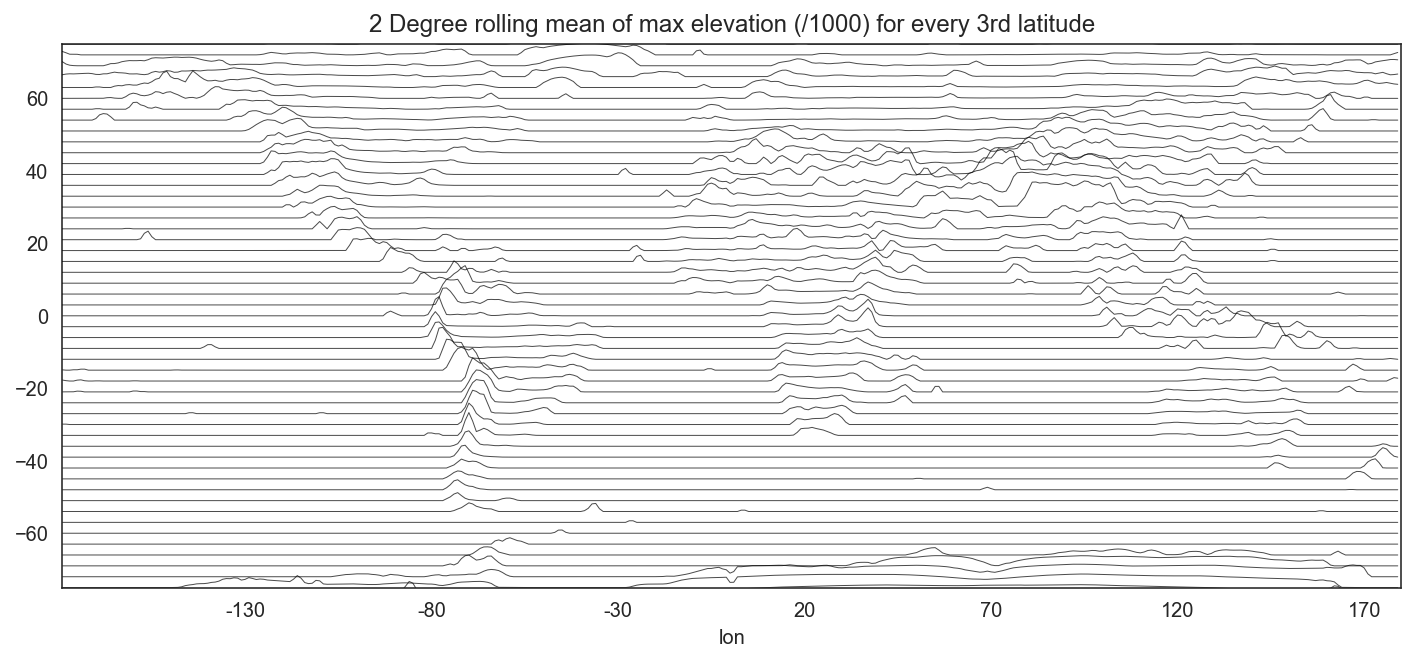

In [92]:
# Now let's try to make it a line plot
sns.set_style('white')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(12,5))

for lat, columns in df.groupby('lat'):
    # Vertical density of lines
    if lat % 3 == 0:
        columns.lon = columns.lon.astype(int) + 180
        
        # Min / Max / Mean
        raw = pd.DataFrame(columns.set_index('lon').reindex(range(0,360)).fillna(0))['max']
        
        #Define the amplitude of the lines
        normalized = raw.rolling(2).mean().apply( lambda d: lat + (d/1000) )
        
        #Now plot the area white (to cover up the row above it, if it exists)
#         ax.fill_between(x=normalized.index, y1=lat, y2=normalized, color='gray', alpha=0.5, zorder=lat+90)
        
        normalized.plot(ax = ax, color='k',linestyle='-',linewidth=0.5, alpha=0.7, zorder=lat)

          
ax.xaxis.set_major_formatter(lambda x, pos: f"{int(x) - 180}")
ax.set_ylim(-75, 75 )
ax.set_xlim(1, 360 )
ax.set_title("2 Degree rolling mean of max elevation (/1000) for every 3rd latitude")